# Customer Segmentation by RFM score using clustering analysis
### Kanja Saha, 12/22/ 2017

## Tables of Contents

1. <a href='#project_overview'>Project Overview</a>
2. <a href='#proposed_solution'>Problem Statement and Proposed Solution</a>
3. <a href='#algorithms'>Algorithms, Techniques and Metrics</a>
4. <a href='#analysis'>Exploratory Analysis and Data Visualization</a>
5. <a href='#preprocessing'>Data Preprocessing</a>
6. <a href='#implementation'>Model Implementation</a>
7. <a href='#evaluation'>Model Evaluation and Refinement</a>
8. <a href='#conclusion'>Conclusion</a>
9. <a href='#reference'>Reference</a>

<a id='project_overview'></a>
### 1. Project Overview

_Create customer segmentation based on RFM score (Recency, Frequency and Monetization) using cluster analyis._

A company exists because of its customers; to be precise, its loyal customers. 
A loyal customer is a satisfied customer whose trust we have earned. And the word "trust" carries a lot of weight and is only earned through consistent positive value of product, service and experience proving that you "know your customer". To reflect that we indeed know our customer, the very first step is that we do not broadcast but communicate with our customers on a individual level. Marketing is just that, a platform for conversation with our userbase.

One very important KPI or business metric used to track performance of marketing campaigns is click through rate(CTR) i.e the percentage of people who clicks on a specific link among total users who view a page, email, or advertisement. This measures engagement with the marketing campaign and our goal is to improve upon that.

One approach to maximize CTR is to create targeted campaigns i.e. to customize campaigns for a group of users within similar demographics/psychographics. This process of finding cutomer groups for personalized communication is called customer segmentation. One of the very popular way of creating customer segments is through RFM score.

RFM (Recency, Frequency, Monetary) analysis is a marketing model for spend behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy. With increasing focus on customer relationship management (CRM), RFM has become an integral part of marketing and business analytics. In machine learning domain, RFM based segmentation is generated through cluster analysis.

For this project, I have used [online retail dataset](https://archive.ics.uci.edu/ml/datasets/online+retail) available at UCI machine learning repository. 

Five number summary of the dataset implied Monetization scale is different from Recency and Frequency values.Normalization is required for RFM score calculation otheriwse monetization will have higher weightage than Recency and Frequency. I decided to use Eucledean distance metric as we have only 3 dimensinoal data and eucledean and simple as effective in lower diemnsiona.

After exploratory analysis with data visualization, here are my observtions:
1. All observations are in one large non spherical cluster. 
2. 93% of the observations have atleast one neighor within .001 unit.
3. 90% of the observations have atleast 4 neighors with .001 unit
4. Frequency has very low variance and Recency and Monetization has positive correlation.
5. Based on elbow method, there are possible 5 to 6 clusters for centroid based clustering.

I considered the following clustering techniques:
1. Hierarchical: nested, exclusive,complete,hard clusters
    - sklearn.cluster, AgglomerativeClustering
2. Partitional
    - HDBScan: A Density-based algorithm. Generates partitional, exclusive, partial, hard clusters
    - K-means: A Centroid-based algorthim. Generate partitional, exclusive, complete, hard clusters
    - GMM: Model (Probabilistic) based: Generate partitional, fuzzy, complete, soft clusters
    - Affnity Propagation: Also a Centroid-based algorthim without cluster hyper parameter. Generate partitional, exclusive, complete, hard clusters
3. Neural Network based: 
    - SOM(Self Organizing Maps): A competetive learning algorithm using artificial neural network

Based on my initial observation, I first eliminated centroid based option as this dataset has one non-spherical cluster and centroid based clusters works best only with uniform spherical clusters.

Although, from observation it is obvious that KMeans and GMM is not the best fit, I have implemented all the five models for completeness and compared the following metric for each model.
1. Min/Max cluster size: A good cluster analysis has each cluster with population between 5-30% of the total population. 
2. Mean and standard deviation of each cluster are meaningful and are not overlapping.

Based on the above two criteria, we see that Hierarchical model is the most suited model for this dataset. Based on the clusters from Hierarchical model, I created the final RFM summary report.



<a id='proposed_solution'></a>
### 2. Problem Statement and Proposed Solution

With the advent of internet, it has become convenient for the users to search their items of their without stepping out of their house. It has also become convenient for business to communicate with their customers through all the available marketing platforms. Trying to reach everyone at once is a simple and inexpensive strategy but if all business communicates with all customers at once, the audience will get overwhelmed and ignore all communication.

It is then important to focus on a segment of your customer base and develop an effective marketing campaign to get their attention. It then becomes more cost-effective to run on a smaller, more focused scale and receive a better return on investment by targeting consumers who have similar demographics/purchase behavior.The first step to building a successful marketing campaign is defining its target. 

In this project, my goal is to build a RFM summary report that create multiple customer segments for targeted marketing campaigns.



<a id='algorithms'></a>
### 3. Algorithms, Techniques & Metrics

I considered the following five clustering techniques:
1. Centroid-based: 
    This is a hard clustering technique (where a datapoint is assigned to only one specific cluster) based on it closeness to the centroid of a cluster. This is most effective in case of spherical/convex clusters.
2. Density-based: 
    This is a hard clustering technique where clusters are defined as areas of higher density than the remainder of the data set. Objects in these sparse areas - that are required to separate clusters - are usually considered to be noise and border points.
3. Hierarchical based: 
    This is another hard clustering technique where one cluster can have one or more cluster nested within it. Hierarchical clustering can be divided into two main types: agglomerative(Start with the points as individual clusters and at each step, merge the closest pair of clusters until only one cluster) and divisive (opposite of agglomerative i.e. starts from the top cluster to the leaf node).
4. Probability model based: 
    These is a hard clustering technique based on the notion of how probable is it that all data points in the cluster belong to the same distribution
5. Graph Dsitance based: 
    This is a soft clustering technique where a probability or likelihood of a data point to be in each of those clusters is assigned.

Since clustering techniques are evaluated based on on empirical evidence, I used the following two metrics to compare performance of the implemented models on this dataset.

1. Min/Max cluster size: A good cluster analysis has each cluster with population between 5-30% of the total population. 
2. Mean and standard deviation of each cluster are meaningful and are not overlapping.
    
    

<a id='analysis'></a>
### 3. Exploratory Analysis and Data Visualization

I have used [online retail dataset](https://archive.ics.uci.edu/ml/datasets/online+retail) available at UCI machine learning repository. 
These datasets include no metadata or reviews, but only (user,item,rating,timestamp) tuples. I will use reviewerID(user), asin(item) and overall(rating) columns for my project.

Following are the details on the dataset.

- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- overall: rating of the product,
- reviewTime - time of the review (raw)

Sample Ratings Only Data:
{
  "reviewerID": "A2SUAM1J3GNN3B",
  "asin": "0000013714",
  "overall": 5.0,
  "reviewTime": "09 13, 2009"
}

[Link to Exploratory Data Analysis](Exploratory_Analysis_Data_Visualization.ipynb)

After exploratory analysis with data visualization, here are my observtions:
1. All observations are in one large non circular cluster. 
2. 90% of the observations have atleast one neighor within X unit.
3. 90% of the observations have atleast Y neighors with Y unit
4. Frequency has very low variance and Recency and Monetization has positive correlation. 

### Data Load and Transformation

In [1]:
#import necessary libraries
import pandas as pd
from IPython.display import display

# Load the dataset into pandas dataframe
raw_data_all = pd.read_excel("Online_Retail.csv")
print ("Dataset has {} rows(samples) with {} columns(features) each.".format(*raw_data_all.shape))

# since we are looking for customer info, drop all records that has no customerid
raw_data_all=raw_data_all.dropna(subset=['CustomerID'])
raw_data=raw_data_all
# display the top 5 rows of the dataset
raw_data_all.head(5)

#summary of dataset's distribution
#raw_data_all.groupby('Description').size()
#raw_data_all[raw_data_all.Description=='thrown away']
#raw_data_all[raw_data_all.StockCode=='84611B']
raw_data_all.describe()

#items with negative quantity implies returned items, and 0 implies no purchase
#raw_data[raw_data.Quantity<=0].head(5)

from datetime import datetime
import numpy as np
import pandas as pd

LastTransactionDate=raw_data['InvoiceDate'].max()

data=raw_data.groupby('CustomerID').apply(lambda x: pd.Series(dict(
    duration=(pd.to_datetime(x.InvoiceDate.max()) - pd.to_datetime(x.InvoiceDate.min())).days+1,
    Recency=(LastTransactionDate-x.InvoiceDate.max()).days,
    return_count=(x.Quantity < 0).sum(),
    purchase_count=(x.Quantity < 0).sum(),
    return_amount=(x.Quantity*x.UnitPrice < 0).sum(),
    purchase_amount=(x.UnitPrice*x.Quantity > 0).sum())))
data.head()

#pd.to_datetime(raw_data.InvoiceDate)).dt.days

Dataset has 541909 rows(samples) with 8 columns(features) each.


Recency  duration  purchase_amount  purchase_count  return_amount  \
CustomerID                                                                      
12346.0         325         1                1               1              1   
12347.0           1       366              182               0              0   
12348.0          74       283               31               0              0   
12349.0          18         1               73               0              0   
12350.0         309         1               17               0              0   

            return_count  
CustomerID                
12346.0                1  
12347.0                0  
12348.0                0  
12349.0                0  
12350.0                0

<a id='preprocessing'></a>
### 5. Data Preprocessing



In [2]:
print('Is there null value in the data frame? {}.' .format('Yes' if (data.isnull().values.any()) else 'No' ))
if (data.isnull().values.any()):
    print(data.isnull().sum())     
    
  

Is there null value in the data frame? No.


In [3]:
import preprocess_data as o
data,outliers,message=o.remove_outliers(data,True)
print (message)

#save customer_id which is an index in the data frame 
CustomerID=data.index

data.describe()

783 (17.91%) data points considered outliers from the dataset of 4372. Outlier Dropped from dataset.


Recency     duration  purchase_amount  purchase_count  \
count  3589.000000  3589.000000      3589.000000     3589.000000   
mean     99.765673   111.954583        62.492895        0.308721   
std     102.634769   124.471361        89.442098        0.617908   
min       0.000000     1.000000         0.000000        0.000000   
25%      21.000000     1.000000        14.000000        0.000000   
50%      58.000000    53.000000        33.000000        0.000000   
75%     158.000000   219.000000        75.000000        0.000000   
max     373.000000   373.000000      1677.000000        2.000000   

       return_amount  return_count  
count    3589.000000   3589.000000  
mean        0.308721      0.308721  
std         0.617908      0.617908  
min         0.000000      0.000000  
25%         0.000000      0.000000  
50%         0.000000      0.000000  
75%         0.000000      0.000000  
max         2.000000      2.000000

Instead of dropping outliers completely, I will save the outlier observations to be marked a one cluster at the end of the analysis.

In [4]:
df_outliers=pd.DataFrame({'customer_id':outliers})
df_outliers['cluster']=-1
df_outliers.describe()

customer_id  cluster
count    783.000000    783.0
mean   15080.819923     -1.0
std     1714.417922      0.0
min    12352.000000     -1.0
25%    13593.500000     -1.0
50%    15021.000000     -1.0
75%    16564.000000     -1.0
max    18274.000000     -1.0

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

data.corr()

C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


Recency  duration  purchase_amount  purchase_count  \
Recency          1.000000 -0.471476        -0.308277       -0.126389   
duration        -0.471476  1.000000         0.481511        0.284941   
purchase_amount -0.308277  0.481511         1.000000        0.158009   
purchase_count  -0.126389  0.284941         0.158009        1.000000   
return_amount   -0.126389  0.284941         0.158009        1.000000   
return_count    -0.126389  0.284941         0.158009        1.000000   

                 return_amount  return_count  
Recency              -0.126389     -0.126389  
duration              0.284941      0.284941  
purchase_amount       0.158009      0.158009  
purchase_count        1.000000      1.000000  
return_amount         1.000000      1.000000  
return_count          1.000000      1.000000

In [6]:
#NORMALIZE DATA 
import preprocess_data as o
n_data=o.normalize_data(data)
#print (message)
n_data.head(5)
n_data.describe()

Recency     duration  purchase_amount  purchase_count  \
count  3589.000000  3589.000000      3589.000000     3589.000000   
mean      0.543614     0.446827         0.316825        0.001771   
std       0.400809     0.410461         0.274490        0.005307   
min       0.000000     0.002613         0.000000        0.000000   
25%       0.113127     0.012418         0.089006        0.000000   
50%       0.563507     0.423086         0.234316        0.000000   
75%       0.984465     0.889010         0.489816        0.000000   
max       0.999993     0.999924         0.999831        0.098414   

       return_amount  return_count  
count    3589.000000   3589.000000  
mean        0.001771      0.001771  
std         0.005307      0.005307  
min         0.000000      0.000000  
25%         0.000000      0.000000  
50%         0.000000      0.000000  
75%         0.000000      0.000000  
max         0.098414      0.098414

C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


Recency  duration  purchase_amount  purchase_count  \
Recency          1.000000 -0.471476        -0.308277       -0.126389   
duration        -0.471476  1.000000         0.481511        0.284941   
purchase_amount -0.308277  0.481511         1.000000        0.158009   
purchase_count  -0.126389  0.284941         0.158009        1.000000   
return_amount   -0.126389  0.284941         0.158009        1.000000   
return_count    -0.126389  0.284941         0.158009        1.000000   

                 return_amount  return_count  
Recency              -0.126389     -0.126389  
duration              0.284941      0.284941  
purchase_amount       0.158009      0.158009  
purchase_count        1.000000      1.000000  
return_amount         1.000000      1.000000  
return_count          1.000000      1.000000

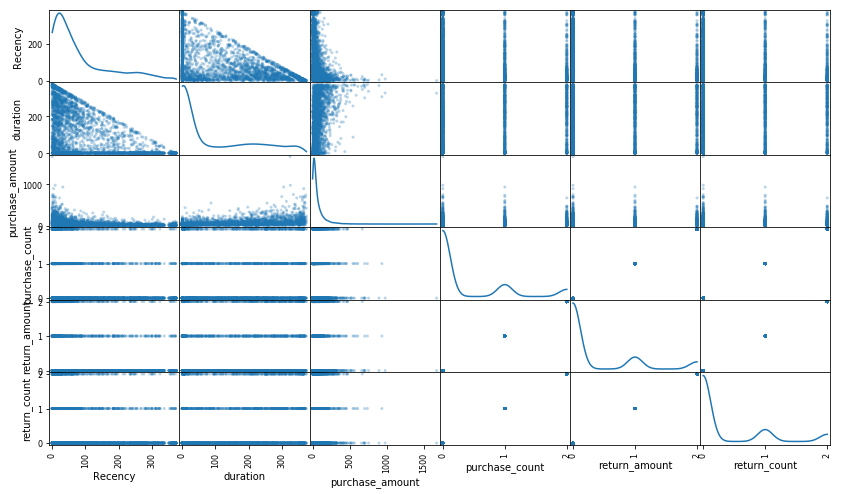

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

data.corr()

In [8]:
#Select a few observations to sample from the dataset
indices = [400,3000,2,1400,1111]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(n_data.loc[indices], columns = n_data.keys()).reset_index(drop = True)
samples_z = pd.DataFrame(n_data.loc[indices], columns = n_data.keys()).reset_index(drop = True)
print ("Chosen samples of dataset:")

#calculate the z score to understand the location of the feauture for each customer in density plot
for col in n_data.columns:
    col_zscore = col + '_zscore'
    samples_z[col_zscore] = (samples_z[col] - data[col].mean())/data[col].std()
samples_z

Chosen samples of dataset:


Recency  duration  purchase_amount  purchase_count  return_amount  \
0  0.193663  0.729962         0.655476             0.0            0.0   
1  0.998708  0.005611         0.050496             0.0            0.0   
2  0.251570  0.962084         0.105387             0.0            0.0   
3  0.999323  0.003661         0.036605             0.0            0.0   
4  0.994864  0.011178         0.100604             0.0            0.0   

   return_count  Recency_zscore  duration_zscore  purchase_amount_zscore  \
0           0.0       -0.970159        -0.893576               -0.691368   
1           0.0       -0.962315        -0.899395               -0.698132   
2           0.0       -0.969594        -0.891711               -0.697518   
3           0.0       -0.962309        -0.899411               -0.698287   
4           0.0       -0.962352        -0.899351               -0.697572   

   purchase_count_zscore  return_amount_zscore  return_count_zscore  
0              -0.499623             -0.499623            -0.499623  
1              -0.499623             -0.499623            -0.499623  
2              -0.499623             -0.499623            -0.499623  
3              -0.499623             -0.499623            -0.499623  
4              -0.499623             -0.499623            -0.499623

In [9]:
# TODO: Scale the data using the natural logarithm
#log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
#log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
#pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Dimension 1    0.7625
Dimension 2    0.9791
Dimension 3    0.9998
Dimension 4    1.0000
Dimension 5    1.0000
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


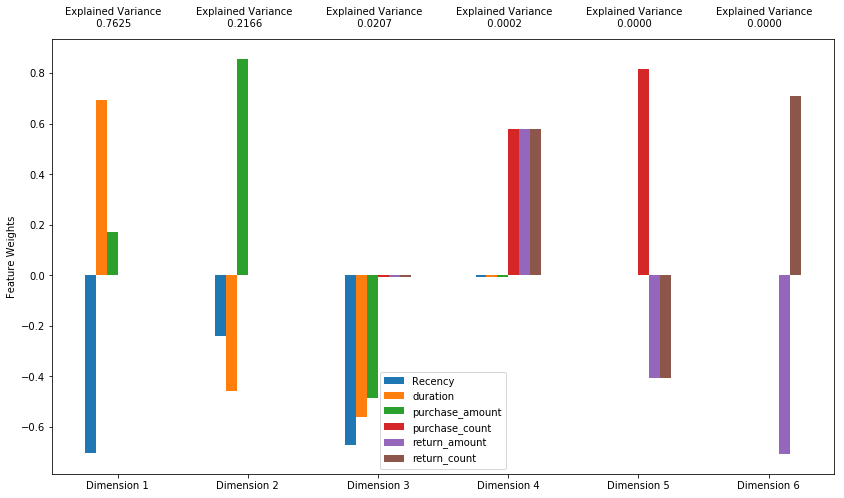

In [10]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
import visuals as vs
good_data=n_data
from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above

pca_samples = pca.transform(samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print (pca_results['Explained Variance'].cumsum())

In [11]:
# TODO: Apply PCA by fitting the good data with only two dimensions
from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)


#display(reduced_data)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

<a id='implementation'></a>
## 6. Model Implementation


In [12]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n in [2,3,4,5,6]:
    clusterer_GMM = GaussianMixture(n_components=n).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds_GMM = clusterer_GMM.predict(reduced_data)

# TODO: Find the cluster centers
    centers_GMM = clusterer_GMM.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds_GMM = clusterer_GMM.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds_GMM, metric='mahalanobis')
    print ("For GMM with n_clusters = {}. The average silhouette_score is : {}".format(n, score))



for n in [2,3,4,5,6]:

    clusterer = KMeans(n_clusters=n).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ("For K-means n_clusters = {}. The average silhouette_score is : {}".format(n, score))


For GMM with n_clusters = 2. The average silhouette_score is : 0.337905064111137
For GMM with n_clusters = 3. The average silhouette_score is : 0.3699304083404745
For GMM with n_clusters = 4. The average silhouette_score is : 0.33568190698261435
For GMM with n_clusters = 5. The average silhouette_score is : 0.38920481309357646
For GMM with n_clusters = 6. The average silhouette_score is : 0.27899456452040616
For K-means n_clusters = 2. The average silhouette_score is : 0.6300189605870956
For K-means n_clusters = 3. The average silhouette_score is : 0.6315357705431112
For K-means n_clusters = 4. The average silhouette_score is : 0.5639750824811008
For K-means n_clusters = 5. The average silhouette_score is : 0.5724709366168461
For K-means n_clusters = 6. The average silhouette_score is : 0.5565519270812308


For GMM
For K-means


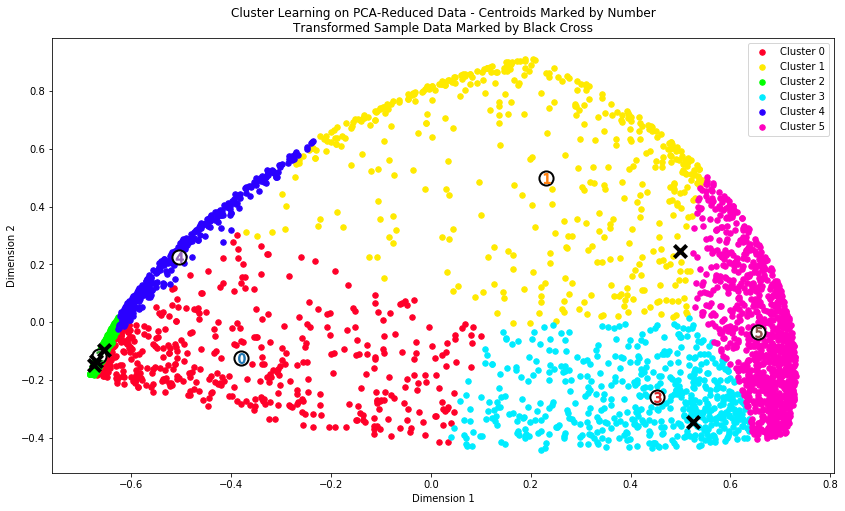

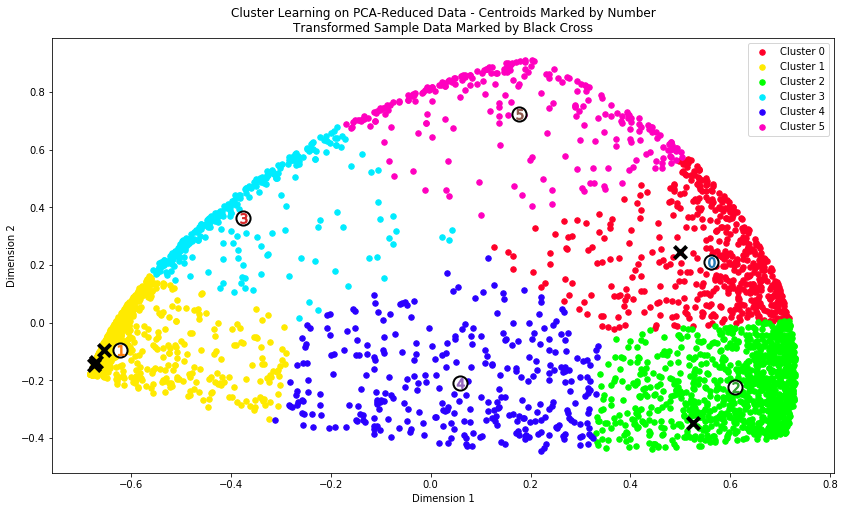

In [13]:
# Display the results of the clustering from implementation
print ("For GMM")
vs.cluster_results(reduced_data, preds_GMM, centers_GMM, pca_samples)

print ("For K-means")
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [14]:
'''
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers_z = true_centers.copy()
#calculate the z score to understand the location of the feauture for each customer in density plot
for col in products:
    col_zscore = col + '_zscore'
    true_centers_z[col_zscore] = (true_centers[col] - data[col].mean())/data[col].std()
true_centers_z

'''

"\n# TODO: Inverse transform the centers\nlog_centers = pca.inverse_transform(centers)\n\n# TODO: Exponentiate the centers\ntrue_centers = np.exp(log_centers)\n\n# Display the true centers\nsegments = ['Segment {}'.format(i) for i in range(0,len(centers))]\ntrue_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())\ntrue_centers.index = segments\ndisplay(true_centers)\n\ntrue_centers_z = true_centers.copy()\n#calculate the z score to understand the location of the feauture for each customer in density plot\nfor col in products:\n    col_zscore = col + '_zscore'\n    true_centers_z[col_zscore] = (true_centers[col] - data[col].mean())/data[col].std()\ntrue_centers_z\n\n"

In [15]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 1


### Common functions

In [16]:
def get_cluster_mean_std(data,model_name):
    cluster_details=pd.DataFrame()
    cluster_details['cluster_size']=data.groupby("cluster").size()
    cluster_details['cluster_size_percent']=(cluster_details['cluster_size']*100)/data.shape[0]
    ''' 
    data['distance']=data['recency_x']+data['frequency_x']+data['monetization_x']
    cluster_details['cluster_size']=data.groupby("cluster").size()
    
    cluster_details['RFMScore_mean']=data.groupby("cluster").agg({'RFMScore': np.mean})
    cluster_details['RFMScore_std']=data.groupby("cluster").agg({'RFMScore': np.std})
    '''
    cluster_details['model_name']=model_name
    return cluster_details


In [17]:
def delete_columns(n_data,data):
    if 'customer_id' in n_data.columns:
        n_data.drop(['customer_id'], axis = 1, inplace = True)
    if 'model_name' in n_data.columns:
        n_data.drop(['model_name'], axis = 1, inplace = True)
    if 'cluster' in n_data.columns:
        n_data.drop(['cluster'], axis = 1, inplace = True)
    if 'customer_id' in data.columns:
        data.drop(['customer_id'], axis = 1, inplace = True)

In [18]:
def save_data(n_data,data,CustomerID,model_name):

    
    n_data['customer_id']=CustomerID
    data['customer_id']=CustomerID
#data['cluster'] = pd.Series(preds, index=data.index)

    data_with_cluster=pd.merge(data, n_data, how='inner', on='customer_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False
         )

    data_with_cluster.to_csv(model_name + '_data_withcluster.csv', index=False)
    return data_with_cluster

## Model Implementations

### Sample Observations

### DBscan 
WIth epsilon=.001, and minPoints=25

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics

delete_columns(n_data,data)

clusterer_DB = DBSCAN(eps=0.001, min_samples=15).fit(n_data)
labels_DB = clusterer_DB.labels_
n_data['cluster']=labels_DB
#display(labels_DB)
#display(len(set(labels_DB)))

#score_DB=1#silhouette_score(n_data, labels_DB, metric='euclidean')

#print("Silhouette Coefficient: %0.3f" % score_DB )


#data_with_cluster.groupby('cluster').size()

dbscan_with_assigned_cluster=save_data(n_data,data,CustomerID,'DBScan')
dbscan_cluster_mean_std=get_cluster_mean_std(dbscan_with_assigned_cluster,'DBScan')
dbscan_with_assigned_cluster.head()

Recency_x  duration_x  purchase_amount_x  purchase_count_x  \
0        325           1                  1                 1   
1          1         366                182                 0   
2         74         283                 31                 0   
3         18           1                 73                 0   
4        309           1                 17                 0   

   return_amount_x  return_count_x  customer_id  Recency_y  duration_y  \
0                1               1      12346.0   0.999976    0.003077   
1                0               0      12347.0   0.002446    0.895401   
2                0               0      12348.0   0.251570    0.962084   
3                0               0      12349.0   0.239384    0.013299   
4                0               0      12350.0   0.998485    0.003231   

   purchase_amount_y  purchase_count_y  return_amount_y  return_count_y  \
0           0.003077          0.003077         0.003077        0.003077   
1           0.445254          0.000000         0.000000        0.000000   
2           0.105387          0.000000         0.000000        0.000000   
3           0.970834          0.000000         0.000000        0.000000   
4           0.054933          0.000000         0.000000        0.000000   

   cluster  
0       -1  
1       -1  
2       -1  
3       -1  
4       -1

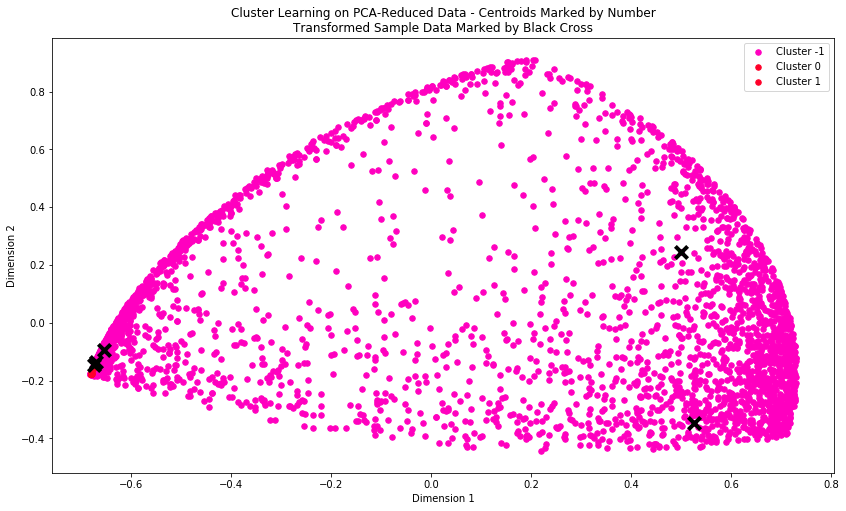

In [20]:
vs.cluster_results(reduced_data, labels_DB, "", pca_samples)


### Plotting clusters from DBscan

### HDBScan

In [21]:
delete_columns(n_data,data)
        
import hdbscan
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40, 
    metric='euclidean', min_cluster_size=5, min_samples=4, p=None)

clusterer.fit(n_data)
labels_HDB=clusterer.labels_
n_data['cluster']=labels_HDB

hdbscan_with_assigned_cluster=save_data(n_data,data,CustomerID,'HDBScan')
hdbscan_cluster_mean_std=get_cluster_mean_std(hdbscan_with_assigned_cluster,'HDBScan')
hdbscan_with_assigned_cluster.head()

Recency_x  duration_x  purchase_amount_x  purchase_count_x  \
0        325           1                  1                 1   
1          1         366                182                 0   
2         74         283                 31                 0   
3         18           1                 73                 0   
4        309           1                 17                 0   

   return_amount_x  return_count_x  customer_id  Recency_y  duration_y  \
0                1               1      12346.0   0.999976    0.003077   
1                0               0      12347.0   0.002446    0.895401   
2                0               0      12348.0   0.251570    0.962084   
3                0               0      12349.0   0.239384    0.013299   
4                0               0      12350.0   0.998485    0.003231   

   purchase_amount_y  purchase_count_y  return_amount_y  return_count_y  \
0           0.003077          0.003077         0.003077        0.003077   
1           0.445254          0.000000         0.000000        0.000000   
2           0.105387          0.000000         0.000000        0.000000   
3           0.970834          0.000000         0.000000        0.000000   
4           0.054933          0.000000         0.000000        0.000000   

   cluster  
0       83  
1      159  
2       -1  
3       36  
4      128

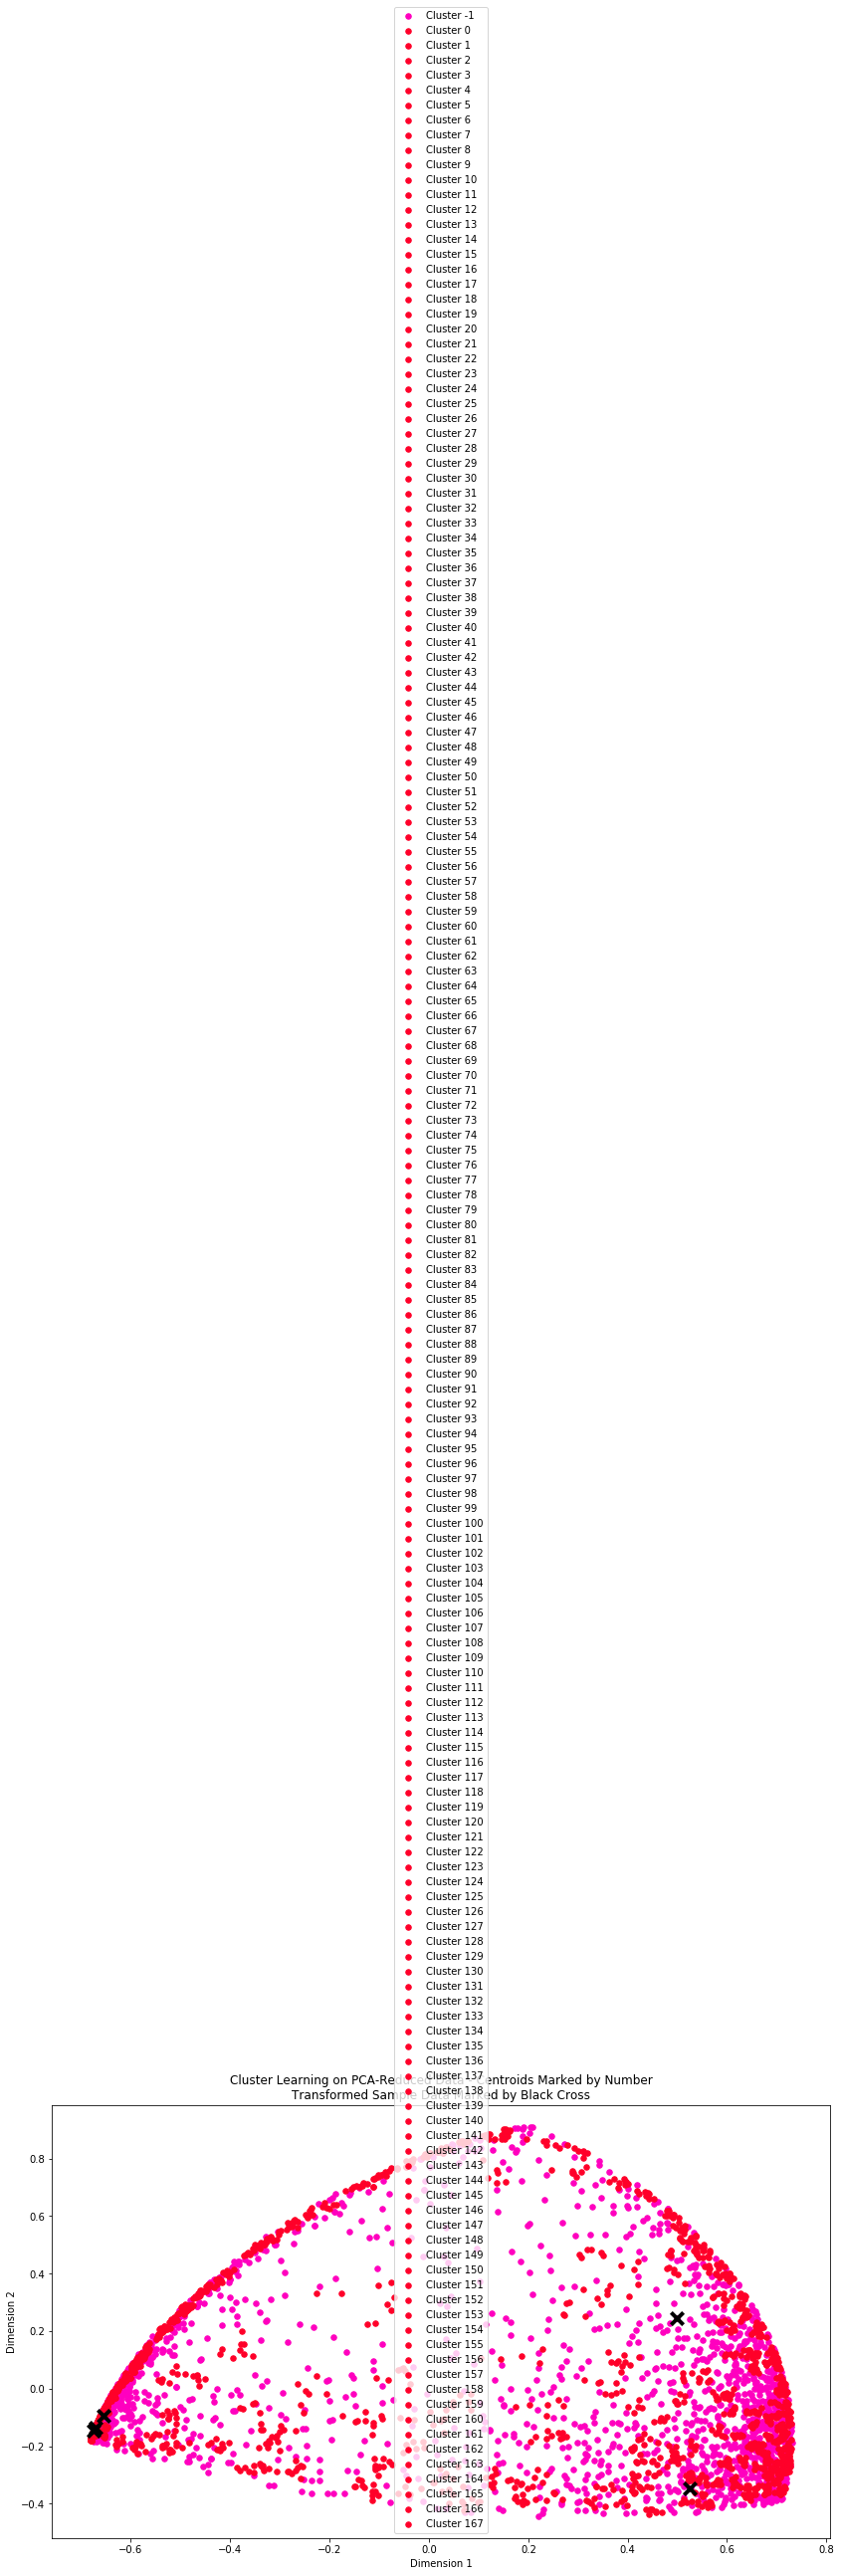

In [22]:
vs.cluster_results(reduced_data, labels_HDB, "", pca_samples)

## Plot clusters from HDBScan

### AgglomerativeClustering

In [23]:
#AgglomerativeClustering
delete_columns(n_data,data)


from sklearn.cluster import AgglomerativeClustering
# Affinity = {"“euclidean", “l1”, “l2”, “manhattan”,
# “cosine”}
# Linkage = {"ward"}#, “complete”, “average”}
Hclustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Hclustering.fit_predict(n_data)
#Hclustering.fit_predict(n_data)
#ms = np.column_stack((ground_truth,Hclustering.labels_))
#df = pd.DataFrame(ms,
# columns = [‘Ground truth’,’Clusters’])
#pd.crosstab(df[‘Ground truth’], df[‘Clusters’],
# margins=True)

labels_HC = Hclustering.labels_
n_data['cluster']=labels_HC

display(labels_HC)
len(set(labels_HC))

#n_data['cluster']=labels_HC
#n_data['customer_id']=CustomerID.astype('Int64')
#display(n_data.head(10))
#true_centers_Kmeans_df_int64['cluster'] = pd.Series(true_centers_Kmeans_df_int64.index, index=true_centers_Kmeans_df_int64.index)
#n_data[['customer_id','cluster']].to_csv('customerwithcluster_HC_monthly_frequency.csv', index=False)

#np.unique(labels_HC)

from collections import Counter


#display(Counter(labels_HC).keys()) # equals to list(set(words))
#display(Counter(labels_HC).values()) # counts the elements' frequency



hc_ag_with_assigned_cluster=save_data(n_data,data,CustomerID,'Agglomerative Clustering')
hc_ag_cluster_mean_std=get_cluster_mean_std(hc_ag_with_assigned_cluster,'Agglomerative Clustering')
hc_ag_with_assigned_cluster.head()

array([3, 0, 0, ..., 0, 1, 0], dtype=int64)

Recency_x  duration_x  purchase_amount_x  purchase_count_x  \
0        325           1                  1                 1   
1          1         366                182                 0   
2         74         283                 31                 0   
3         18           1                 73                 0   
4        309           1                 17                 0   

   return_amount_x  return_count_x  customer_id  Recency_y  duration_y  \
0                1               1      12346.0   0.999976    0.003077   
1                0               0      12347.0   0.002446    0.895401   
2                0               0      12348.0   0.251570    0.962084   
3                0               0      12349.0   0.239384    0.013299   
4                0               0      12350.0   0.998485    0.003231   

   purchase_amount_y  purchase_count_y  return_amount_y  return_count_y  \
0           0.003077          0.003077         0.003077        0.003077   
1           0.445254          0.000000         0.000000        0.000000   
2           0.105387          0.000000         0.000000        0.000000   
3           0.970834          0.000000         0.000000        0.000000   
4           0.054933          0.000000         0.000000        0.000000   

   cluster  
0        3  
1        0  
2        0  
3        1  
4        3

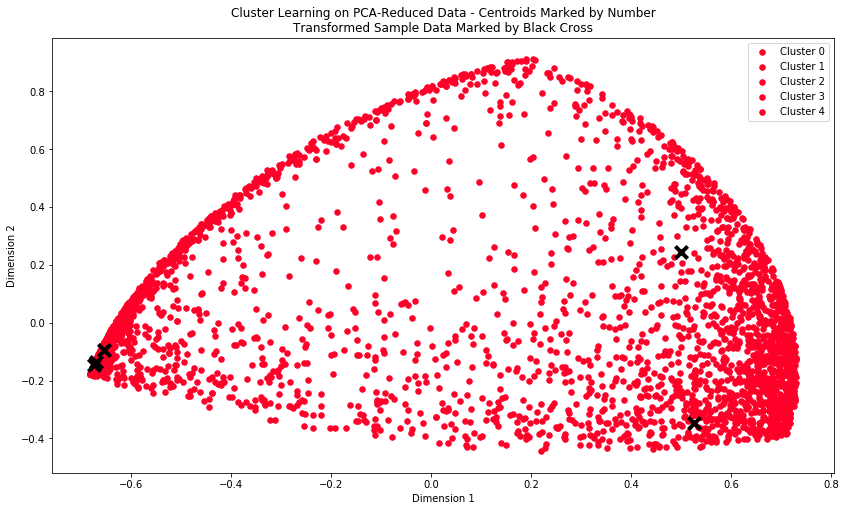

In [24]:
vs.cluster_results(reduced_data, labels_HC, "", pca_samples)

### Plotting clusters from Agglomerative Clustering

## Dendogram from Agglomerative Clustering

array([   0,    1,    2, ..., 3585, 3586, 3587])

array([   2,    3,    4, ..., 3587, 3588, 3589])

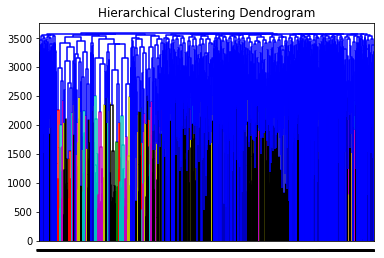

In [25]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    display(distance)

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    display(no_of_observations)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    #dendrogram(linkage_matrix, p=3, truncate_mode='level', **kwargs)
    dendrogram(linkage_matrix, p=30, truncate_mode='level', **kwargs)

### Plotting clusters from HIerarchical

from matplotlib import pyplot as plt


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(Hclustering, labels=Hclustering.labels_)
plt.show()

#n_data.groupby("cluster").size()
#cluster_pivot= pd.pivot(n_data, index=['customer_id'],  columns=['cluster'], values=['cluster'])



{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

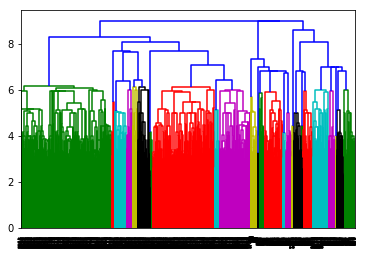

In [26]:
# move to visuallization template

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(n_data)

dendrogram(Z) 

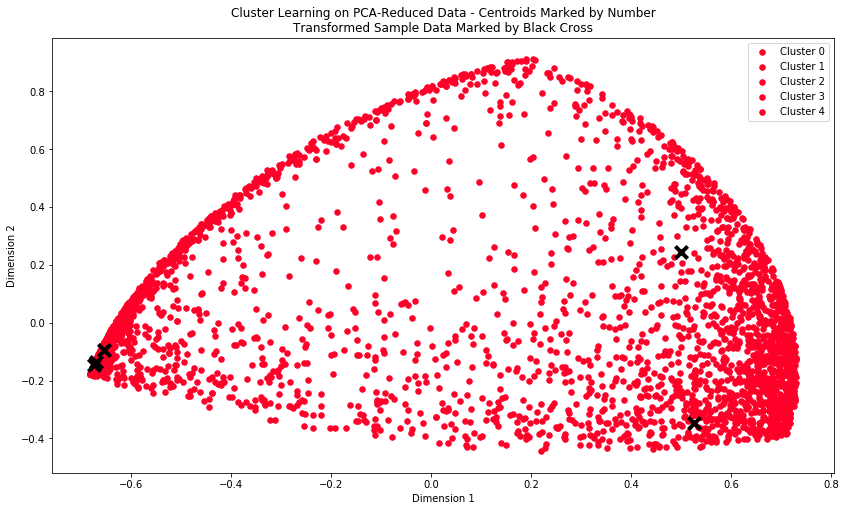

In [27]:
vs.cluster_results(reduced_data, labels_HC, "", pca_samples)

### Kmeans 

In [28]:
#Find cluster centers and size using Kmeans
# Loop through clusters
delete_columns(n_data,data)


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = range(6,7)
for n_clusters in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(n_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(n_data)
    
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)
    labels_kmeans=clusterer.labels_
    n_data['cluster']=labels_kmeans
    '''
    #cluster centers
    centers = clusterer.cluster_centers_
    score=silhouette_score(n_data, preds, metric='euclidean')

    #centroids of each cluster
    centers_df = pd.DataFrame(centers)
    centers_df.columns=data.columns
    
    cluster_size=np.bincount(preds)
    centers_df.insert(loc=0, column='cluster_size', value=cluster_size)
    centers_df_int64=centers_df#.astype('int64')
    
    print ("For n_clusters = {}".format(n_clusters))
    print("Silhouette Coefficient: %0.3f" % score )

    display(centers_df_int64)    

'''

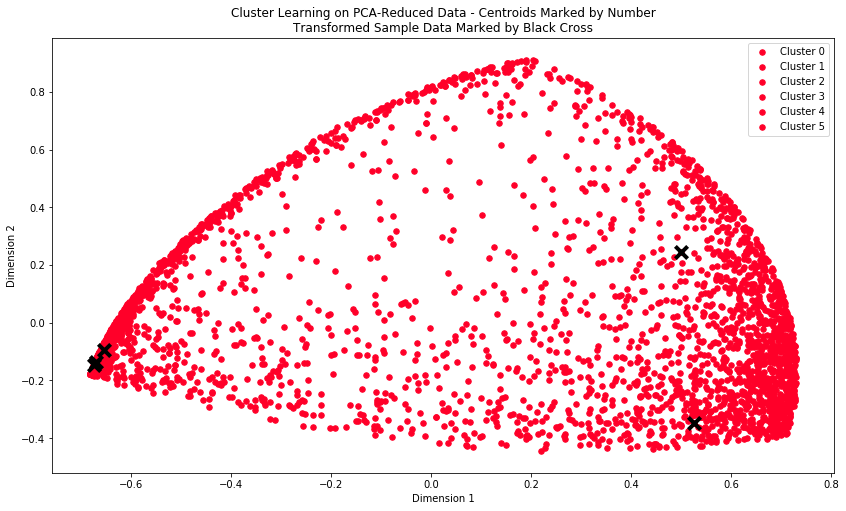

In [29]:
vs.cluster_results(reduced_data, labels_kmeans, "", pca_samples)

In [30]:
kmeans_with_assigned_cluster=save_data(n_data,data,CustomerID,'Kmeans')
kmeans_cluster_mean_std=get_cluster_mean_std(kmeans_with_assigned_cluster,'Kmeans')
kmeans_cluster_mean_std.head()

cluster_size  cluster_size_percent model_name
cluster                                               
0                 927             25.828922     Kmeans
1                1277             35.580942     Kmeans
2                 501             13.959320     Kmeans
3                 348              9.696294     Kmeans
4                 239              6.659237     Kmeans

### Plotting clusters from Kmeans

### GMM Implementation

In [31]:
#Find cluster centers and size using GaussianMixture
# Loop through clusters
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

delete_columns(n_data,data)

range_n_clusters = range(6,7)
for n in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(n_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(n_data)
    
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)
    n_data['cluster']= preds  #pd.Series(preds, index=data.index)
    
'''
    #cluster centers
    centers = clusterer.means_
    score = silhouette_score(n_data, preds, metric='mahalanobis')

    #centroids of each cluster
    centers_df = pd.DataFrame(centers)
    
    
    cluster_size=np.bincount(preds)
    centers_df.insert(loc=0, column='cluster_size', value=cluster_size)
    centers_df_int64=centers_df#.astype('int64')
    
    print ("For GMM with n_clusters = {}. The average silhouette_score is : {}".format(n, score))
    display(centers_df_int64)  
    #Display the predictions
    for i, pred in enumerate(sample_preds):
        print ("Sample point", i, "predicted to be in Cluster", pred)
'''
gmm_with_assigned_cluster=save_data(n_data,data,CustomerID,'GMM')
gmm_cluster_mean_std=get_cluster_mean_std(gmm_with_assigned_cluster,'GMM')
gmm_with_assigned_cluster.head()


Recency_x  duration_x  purchase_amount_x  purchase_count_x  \
0        325           1                  1                 1   
1          1         366                182                 0   
2         74         283                 31                 0   
3         18           1                 73                 0   
4        309           1                 17                 0   

   return_amount_x  return_count_x  customer_id  Recency_y  duration_y  \
0                1               1      12346.0   0.999976    0.003077   
1                0               0      12347.0   0.002446    0.895401   
2                0               0      12348.0   0.251570    0.962084   
3                0               0      12349.0   0.239384    0.013299   
4                0               0      12350.0   0.998485    0.003231   

   purchase_amount_y  purchase_count_y  return_amount_y  return_count_y  \
0           0.003077          0.003077         0.003077        0.003077   
1           0.445254          0.000000         0.000000        0.000000   
2           0.105387          0.000000         0.000000        0.000000   
3           0.970834          0.000000         0.000000        0.000000   
4           0.054933          0.000000         0.000000        0.000000   

   cluster  
0        1  
1        0  
2        4  
3        2  
4        1

In [32]:
#vs.cluster_results(reduced_data, labels_kmeans, "", pca_samples)

### Plotting from GMM clusters

### Graph Based CLustering

In [33]:
#### AffinityPropagation

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

delete_columns(n_data,data)


# Compute Affinity Propagation
ap = AffinityPropagation().fit(n_data)
cluster_centers_indices = ap.cluster_centers_indices_
labels_ap = ap.labels_

n_clusters_ = len(cluster_centers_indices)
n_data['cluster']=labels_ap


import matplotlib.pyplot as plt
from itertools import cycle

ap_with_assigned_cluster=save_data(n_data,data,CustomerID,'Affinity Propagation')
ap_cluster_mean_std=get_cluster_mean_std(ap_with_assigned_cluster,'Affinity Propagation')
ap_with_assigned_cluster.head()

Recency_x  duration_x  purchase_amount_x  purchase_count_x  \
0        325           1                  1                 1   
1          1         366                182                 0   
2         74         283                 31                 0   
3         18           1                 73                 0   
4        309           1                 17                 0   

   return_amount_x  return_count_x  customer_id  Recency_y  duration_y  \
0                1               1      12346.0   0.999976    0.003077   
1                0               0      12347.0   0.002446    0.895401   
2                0               0      12348.0   0.251570    0.962084   
3                0               0      12349.0   0.239384    0.013299   
4                0               0      12350.0   0.998485    0.003231   

   purchase_amount_y  purchase_count_y  return_amount_y  return_count_y  \
0           0.003077          0.003077         0.003077        0.003077   
1           0.445254          0.000000         0.000000        0.000000   
2           0.105387          0.000000         0.000000        0.000000   
3           0.970834          0.000000         0.000000        0.000000   
4           0.054933          0.000000         0.000000        0.000000   

   cluster  
0     1739  
1        0  
2        1  
3      115  
4        2

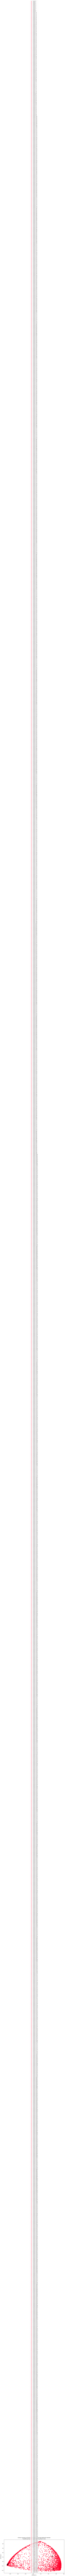

In [34]:
vs.cluster_results(reduced_data, labels_ap, "", pca_samples)

### Plotting for Affinity Propagation

<a id='evaluation'></a>
### 7. Model Evaluation and Refinement

Further Improvement:
I would like to implement graph-based clustering using AffinityPropagation/Spectral Clustering technique available in sklearn. and compare its performance wrt to the 4 implemented models.

### Compare all models mean and std by cluster

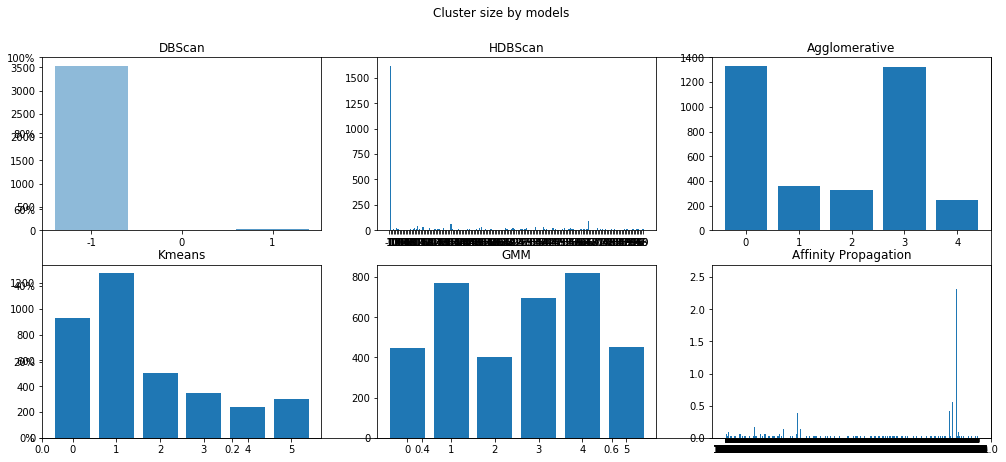

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter

plt.figure()

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(17)
axs.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax1 = fig.add_subplot(231)
ax1.bar(dbscan_cluster_mean_std.index.astype(str), dbscan_cluster_mean_std.cluster_size, align='center', alpha=0.5)
ax1.set_title('DBScan')

ax2 = fig.add_subplot(232)
ax2.bar(hdbscan_cluster_mean_std.index.astype(str), hdbscan_cluster_mean_std.cluster_size)
ax2.set_title('HDBScan')

ax3 = fig.add_subplot(233)
ax3.bar(hc_ag_cluster_mean_std.index.astype(str), hc_ag_cluster_mean_std.cluster_size)
ax3.set_title('Agglomerative')

ax4 = fig.add_subplot(234)
ax4.bar(kmeans_cluster_mean_std.index.astype(str), kmeans_cluster_mean_std.cluster_size)
ax4.set_title('Kmeans')

ax5 = fig.add_subplot(235)
ax5.bar(gmm_cluster_mean_std.index.astype(str), gmm_cluster_mean_std.cluster_size)
ax5.set_title('GMM')

ax6 = fig.add_subplot(236)
ax6.bar(ap_cluster_mean_std.index.astype(str), ap_cluster_mean_std.cluster_size_percent)
ax6.set_title('Affinity Propagation')

fig.suptitle('Cluster size by models')

plt.show()


In [36]:
import sompy
mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anythi

v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')ng

som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

ImportError: No module named 'sompy'

<a id='conclusion'></a>
### 8. Conclusion

<a id='reference'></a>
### 9. Reference
graph based clustering: https://calculatedcontent.com/2012/10/09/spectral-clustering/

Density based clustering..https://codeahoy.com/2017/02/19/cluster-analysis-using-k-means-explained/

t-SNE: http://lvdmaaten.github.io/tsne/

Cluster Analysis: Basic Concepts and Algorithm: https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf

DB SCAN: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

sparch tools: https://github.com/alitouka/spark_dbscan/wiki/Choosing-parameters-of-DBSCAN-algorithm

RFM score: https://www.putler.com/rfm-analysis/

Astropy: http://docs.astropy.org/en/stable/install.html#anaconda-install

Astropy:https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram

Dendogram: https://stackoverflow.com/questions/29127013/plot-dendrogram-using-sklearn-agglomerativeclustering

Dendogram: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py

HCC: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

https://stats.stackexchange.com/questions/3713/choosing-a-clustering-method#4281?newreg=4c3979e5a0fd42778d607c2ccaeb0cac

http://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

https://staffblogs.le.ac.uk/bayeswithstata/2014/05/22/mixture-models-how-many-components/

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

https://stats.stackexchange.com/questions/195456/how-to-select-a-clustering-method-how-to-validate-a-cluster-solution-to-warran

### Miscllneous
Different Types of Clusterings
hierarchical (nested) versus partitional (unnested)
exclusive versus overlapping versus fuzzy
complete versus partial

Questions to ask:
Is data Hierarchical versus Partitional:whether the set of clusters is nested or unnestedl. 
A partitional clustering is simply a division of the set of data objects into non-overlapping subsets (clusters) such that each data object is in exactly one subset. 

If we permit clusters to have subclusters, then we obtain a hierarchical clustering, which is a set of nested clusters that are organized as a tree. Each node (cluster) in the tree (except for the leaf nodes) is the union of its children (subclusters), and the root of the tree is the cluster containing all the objects. Often, but not always, the leaves of the tree are singleton clusters of individual data objects.

Exclusive versus Overlapping versus Fuzzy There are many situations in which a point could reasonably be placed in more than one cluster, and these situations are better addressed by non-exclusive clustering. In the most general sense, an overlapping or non-exclusive clustering is used to reflect the fact that an object can simultaneously belong to more than one group (class). 

In a fuzzy clustering, every object belongs to every cluster with a mem- bership weight that is between 0 (absolutely doesn’t belong) and 1 (absolutely belongs). In other words, clusters are treated as fuzzy sets. (Mathematically, a fuzzy set is one in which an object belongs to any set with a weight that is between 0 and 1. In fuzzy clustering, we often impose the additional constraint that the sum of the weights for each object must equal 1.) Similarly, probabilistic clustering techniques compute the probability with which each point belongs to each cluster, and these probabilities must also sum to 1. These approaches are most appropriate for avoiding the arbitrariness of assigning an object to only one cluster when it may be close to several. In practice, a fuzzy or probabilistic clustering is often converted to an exclusive clustering by assigning each object to the cluster in which its membership weight or probability is highest.

Complete versus Partial A complete clustering assigns every object to a cluster, whereas a partial clustering does not. The motivation for a partial clustering is that some objects in a data set may not belong to well-defined groups. Many times objects in the data set may represent noise, outliers, or “uninteresting background.” 

Clustering aims to find useful groups of objects (clusters), where usefulness is defined by the goals of the data analysis. 

Well-Separated A cluster is a set of objects in which each object is closer (or more similar) to every other object in the cluster than to any object not in the cluster. Sometimes a threshold is used to specify that all the objects in a cluster must be sufficiently close (or similar) to one another. This idealistic definition of a cluster is satisfied only when the data contains natural clusters that are quite far from each other.Well-separated clusters do not need to be globular, but can have any shape.
Prototype-Based A cluster is a set of objects in which each object is closer (more similar) to the prototype that defines the cluster than to the prototype of any other cluster. For data with continuous attributes, the prototype of a cluster is often a centroid, i.e., the average (mean) of all the points in the clus- ter. When a centroid is not meaningful, such as when the data has categorical attributes, the prototype is often a medoid, i.e., the most representative point of a cluster. For many types of data, the prototype can be regarded as the most central point, and in such instances, we commonly refer to prototype- based clusters as center-based clusters. Not surprisingly, such clusters tend to be globular. 

Graph-Based If the data is represented as a graph, where the nodes are objects and the links represent connections among objects (see Section 2.1.2), then a cluster can be defined as a connected component; i.e., a group of objects that are connected to one another, but that have no connection to objects outside the group. An important example of graph-based clusters are contiguity-based clusters, where two objects are connected only if they are within a specified distance of each other. This implies that each object in a contiguity-based cluster is closer to some other object in the cluster than to any point in a different cluster.

Other types of graph-based clusters are also possible. One such approach (Section 8.3.2) defines a cluster as a clique; i.e., a set of nodes in a graph that are completely connected to each other. Specifically, if we add connections between objects in the order of their distance from one another, a cluster is formed when a set of objects forms a clique. Like prototype-based clusters, such clusters tend to be globular.

Density-Based A cluster is a dense region of objects that is surrounded by a region of low density. A density- based definition of a cluster is often employed when the clusters are irregular or intertwined, and when noise and outliers are present. 

Shared-Property (Conceptual Clusters) More generally, we can define a cluster as a set of objects that share some property. This definition encom- passes all the previous definitions of a cluster; e.g., objects in a center-based cluster share the property that they are all closest to the same centroid or medoid. However, the shared-property approach also includes new types of clusters.  a clustering algorithm would need a very specific concept of a cluster to successfully detect these clusters. The process of find- ing such clusters is called conceptual clustering. 
• K-means. This is a prototype-based, partitional clustering technique that attempts to find a user-specified number of clusters (K), which are represented by their centroids.
• Agglomerative Hierarchical Clustering. This clustering approach refers to a collection of closely related clustering techniques that produce a hierarchical clustering by starting with each point as a singleton cluster and then repeatedly merging the two closest clusters until a single, all- encompassing cluster remains. Some of these techniques have a natural interpretation in terms of graph-based clustering, while others have an interpretation in terms of a prototype-based approach.
• DBSCAN. This is a density-based clustering algorithm that produces a partitional clustering, in which the number of clusters is automatically determined by the algorithm. Points in low-density regions are classi- fied as noise and omitted; thus, DBSCAN does not produce a complete clustering.

Baysian Hierarchichal Clustering

### Why normalize?
K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance.
In distance-based classification, for instance, we need to normalize eache feature value of a feature vector in order to not get conditioned by features with wider range of possible values when computing distances.
If a feature has range in [-1,1] and another feature has range in [-100; 100], a small variation in the feature 2 is probably more influencing than a big variation in feature 1 when computing the distance of two feature vectors.

In this project, frequency range is small compared to monetization range. for example a user bought 10 times and spend 1000 and another user bought 20 times and spend 1010. It may seem like the difference in frequency is same as the difference in 
monetization, which is not the case.

### K-Means Clustering

K-means and its variations have a number of limitations with respect to finding different types of clusters. In particular, K-means has difficulty detecting the “natural” clusters, when clusters have non-spherical shapes or widely different sizes or densities.The difficulty in these three situations is that the K-means objective function is a mismatch for the kinds of clusters we are trying to find since it is minimized by globular clusters of equal size and density or by clusters that are well separated. However, these limitations can be overcome, in some sense, if the user is willing to accept a clustering that breaks the natural clusters into a number of subclusters. 
K-means is simple and can be used for a wide variety of data types. It is also quite efficient, even though multiple runs are often performed. Some variants, including bisecting K-means, are even more efficient, and are less suscepti- ble to initialization problems. K-means is not suitable for all types of data,
 It cannot handle non-globular clusters or clusters of different sizes and densities, although it can typically find pure subclusters if a large enough number of clusters is specified. K-means also has trouble clustering data that contains outliers. Outlier detection and removal can help significantly in such situations. Finally, K-means is restricted to data for which there is a notion of a center (centroid). A related technique, K-medoid clustering, does not have this restriction, but is more expensive.


K-means is centroid based technique which works well when there is well defined deparation.
In K-means clustering Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance 

Prototype-based clustering techniques create a one-level partitioning of the data objects. There are a number of such techniques, but two of the most prominent are K-means and K-medoid. K-means defines a prototype in terms of a centroid, which is usually the mean of a group of points, and is typically
(b) Center-based clusters. Each point is closer to the center of its cluster than to the center of any other cluster.
(c) Contiguity-based clusters. Each point is closer to at least one point in its cluster than to any point in another cluster.
(d) Density-based clusters. Clus- ters are regions of high density sep- arated by regions of low density.

K-Means procedure - which is a vector quantization method often used as a clustering method - does not explicitly use pairwise distances b/w data points at all (in contrast to hierarchical and some other clusterings which allow for arbitrary proximity measure). It amounts to repeatedly assigning points to the closest centroid thereby using Euclidean distance from data points to a centroid. However, K-Means is implicitly based on pairwise Euclidean distances b/w data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. The term "centroid" is itself from Euclidean geometry. It is multivariate mean in euclidean space. Euclidean space is about euclidean distances. Non-Euclidean distances will generally not span Euclidean space. That's why K-Means is for Euclidean distances only.

K-Means clustering is a fast, robust, and simple algorithm that gives reliable results when data sets are distinct or well separated from each other in a linear fashion. It is best used when the number of cluster centers, is specified due to a well-defined list of types shown in the data. However, it is important to keep in mind that K-Means clustering may not perform well if it contains heavily overlapping data, if the Euclidean distance does not measure the underlying factors well, or if the data is noisy or full of outliers 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Assume the data have been clustered via any technique, such as k-means, into {\displaystyle k} k clusters. For each datum {\displaystyle i} i, let {\displaystyle a(i)} a(i) be the average distance between {\displaystyle i} i and all other data within the same cluster. We can interpret {\displaystyle a(i)} a(i) as a measure of how well {\displaystyle i} i is assigned to its cluster (the smaller the value, the better the assignment). We then define the average dissimilarity of point {\displaystyle i} i to a cluster {\displaystyle c} c as the average of the distance from {\displaystyle i} i to all points in {\displaystyle c} c.

Let {\displaystyle b(i)} b(i) be the lowest average distance of {\displaystyle i} i to all points in any other cluster, of which {\displaystyle i} i is not a member. The cluster with this lowest average dissimilarity is said to be the "neighbouring cluster" of {\displaystyle i} i because it is the next best fit cluster for point {\displaystyle i} i. We now define a silhouette:

{\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}} s(i) = \frac{b(i) - a(i)}{\max\{a(i),b(i)\}}
Which can be also written as:

{\displaystyle s(i)={\begin{cases}1-a(i)/b(i),&{\mbox{if }}a(i)<b(i)\\0,&{\mbox{if }}a(i)=b(i)\\b(i)/a(i)-1,&{\mbox{if }}a(i)>b(i)\\\end{cases}}} s(i) = \begin{cases}
  1-a(i)/b(i), & \mbox{if } a(i) < b(i) \\
  0,  & \mbox{if } a(i) = b(i) \\
  b(i)/a(i)-1, & \mbox{if } a(i) > b(i) \\
\end{cases}
From the above definition it is clear that

{\displaystyle -1\leq s(i)\leq 1}  -1 \le s(i) \le 1


The x % is a measure of the total variance in your data set that is explained by the clustering. k-means minimize the within group dispersion and maximize the between-group dispersion. By assigning the samples to k clusters rather than n (number of samples) clusters achieved a reduction in sums of squares of x %.

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean \mu_j of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)

Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.
K-Means algorithm go with minimum sum of squares to identify clusters of data points. Le’s say a data set has n observations of m variables. Here, we first identify initial centers of clusters. To perform this we can follow below steps: 
